In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
gold = pd.read_csv("gold_price_data.csv")

In [3]:
print("Dataset Shape:", gold.shape)

Dataset Shape: (5215, 7)


In [4]:
print("Columns:", gold.columns.tolist())

Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


In [5]:
print("\nFirst 5 rows:\n", gold.head())


First 5 rows:
          date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [6]:
# 2. Check missing values and duplicates
print("\nMissing Values:\n", gold.isnull().sum())
print("\nNumber of duplicate rows:", gold.duplicated().sum())



Missing Values:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Number of duplicate rows: 0


In [7]:
# Remove duplicates
gold = gold.drop_duplicates()
print("Shape after removing duplicates:", gold.shape)


Shape after removing duplicates: (5215, 7)


In [8]:
# 3. Exploratory Data Analysis (EDA)
print("\nDescriptive Statistics:\n", gold.describe())


Descriptive Statistics:
               open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


<Figure size 1200x600 with 0 Axes>

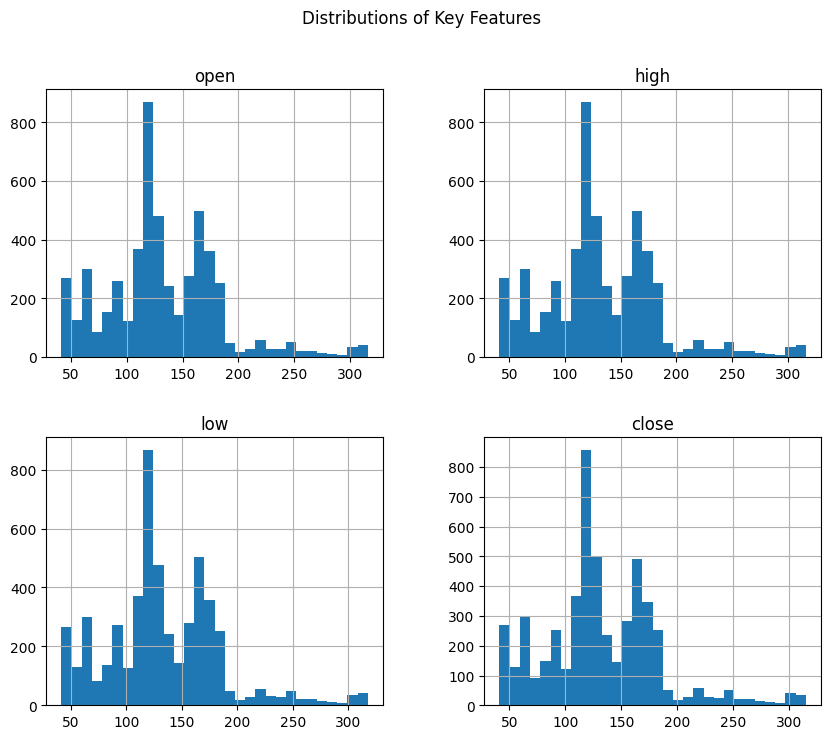

In [9]:
# Plot distributions of key features
plt.figure(figsize=(12,6))
gold[['open','high','low','close']].hist(bins=30, figsize=(10,8))
plt.suptitle("Distributions of Key Features")
plt.show()

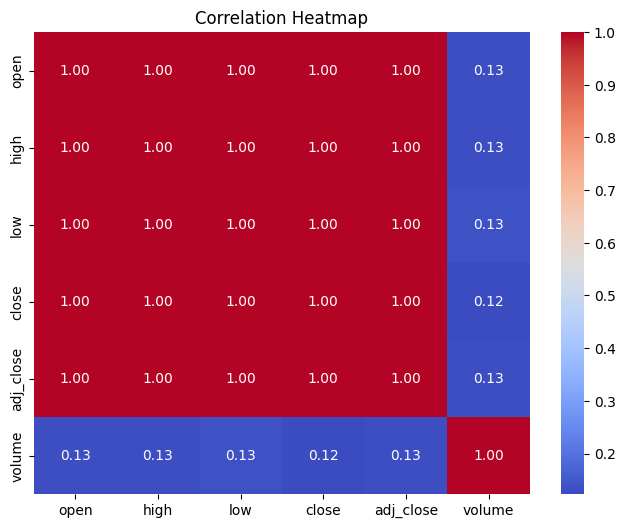

In [11]:
# 4. Correlation Heatmap (fix: only numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(gold.select_dtypes(include=['number']).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
X = gold[['open','high','low','volume']]
y = gold['close']

In [13]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# 7. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 8. Evaluate model
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("\nModel Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Model Performance:
MSE: 0.2584577487369321
RMSE: 0.5083874002539128
R² Score: 0.9999031349631181


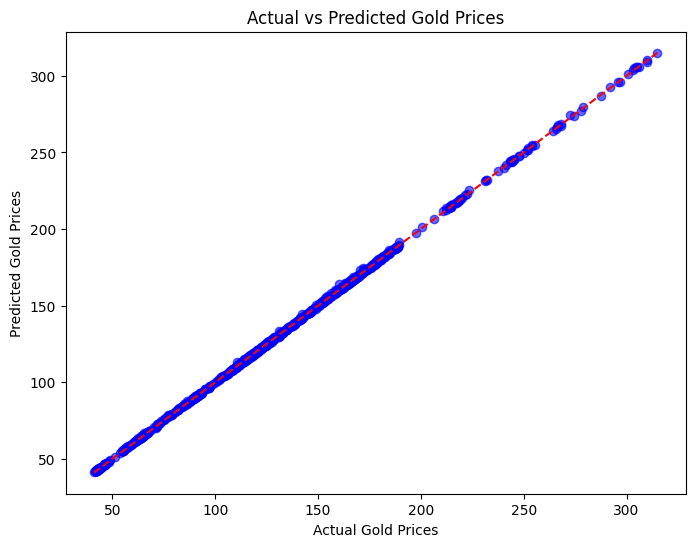

In [18]:
# 9. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Gold Prices")
plt.ylabel("Predicted Gold Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # reference line
plt.show()
